In [1]:
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import *
from keras.models import Sequential

## **Read Dataset**

In [2]:
df=pd.read_csv('tsla.us.txt')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [4]:
# Spilt Data into train & test 
# Train --> 80 % of data
# Test --> 20 % of data

train_size=int(len(df)*0.80)
data_length=len(df)

train=df[0:train_size]
test=df[train_size:data_length]

In [5]:
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [6]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


## **Data Preprocessing**

In [7]:
train=train.loc[:,['Open']]

scaler=StandardScaler()

train_scaled=scaler.fit_transform(train)


In [8]:
# Identifier time step
# Split train set into x_train & y_train

time_step=40
x_train=[]
y_train=[]

for i in range(time_step,len(train_scaled)):
    x_train.append(train_scaled[i-time_step:i,0])
    y_train.append(train_scaled[i,0])

In [9]:
# Convert x_train & y_train into array
x_train=np.array(x_train)
y_train=np.array(y_train)

In [10]:
x_train.shape

(1446, 40)

In [11]:
# Convert shape of x_train to 3D because model receive data into 3D
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
x_train.shape

(1446, 40, 1)

In [73]:
rnn_model=Sequential()

# Add RNN layer with tanh activation function & input_shape
rnn_model.add(SimpleRNN(128,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add Dropout layer to prevent overfitting
rnn_model.add(Dropout(0.20))

# Add RNN layer with tanh activation function
rnn_model.add(SimpleRNN(128,activation='tanh',return_sequences=True))

rnn_model.add(Dropout(0.20))

# Add RNN layer with tanh activation function
rnn_model.add(SimpleRNN(128,activation='tanh',return_sequences=True))


rnn_model.add(SimpleRNN(128))

# Add Dense layer --> output layer
rnn_model.add(Dense(1))

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
# Compile model
rnn_model.compile(optimizer='adam',loss='mse')


In [75]:
rnn_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.8207
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0363
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0224
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0207
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0181
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0129
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0306
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0237
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0379
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0210
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144
Epoc

## **Test Model**

In [76]:
test_array=test.loc[:,['Open']].values

In [77]:
total_data=pd.concat((df['Open'],test['Open']),axis=0)

In [78]:
inputs=total_data[len(total_data)-len(test)-time_step:].values.reshape(-1,1)
inputs

array([[380.25 ],
       [380.   ],
       [373.   ],
       [374.9  ],
       [366.49 ],
       [353.15 ],
       [350.93 ],
       [349.9  ],
       [339.88 ],
       [341.86 ],
       [342.52 ],
       [335.9  ],
       [351.25 ],
       [356.   ],
       [353.1  ],
       [349.65 ],
       [346.8  ],
       [353.89 ],
       [352.95 ],
       [356.98 ],
       [353.76 ],
       [350.91 ],
       [355.97 ],
       [355.56 ],
       [352.69 ],
       [349.88 ],
       [338.8  ],
       [336.7  ],
       [327.78 ],
       [319.75 ],
       [319.18 ],
       [320.23 ],
       [332.25 ],
       [300.13 ],
       [299.5  ],
       [307.   ],
       [301.02 ],
       [305.5  ],
       [302.5  ],
       [302.5  ],
       [216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [21

In [79]:
inputs=scaler.transform(inputs)

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
inputs.shape

(412, 1)

In [81]:
x_test=[]

for i in range(time_step,inputs.shape[0]):
    x_test.append(inputs[i-time_step:i-0])

In [82]:
x_test=np.array(x_test)

In [83]:
x_test.shape

(372, 40, 1)

In [84]:
ypred=rnn_model.predict(x_test)
ypred

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


array([[1.7048718 ],
       [1.6549932 ],
       [1.5352603 ],
       [1.3918182 ],
       [1.27214   ],
       [1.1960436 ],
       [1.151681  ],
       [1.1268132 ],
       [1.1198021 ],
       [1.1267278 ],
       [1.1375029 ],
       [1.16201   ],
       [1.1964921 ],
       [1.2237381 ],
       [1.2321235 ],
       [1.2228457 ],
       [1.2020425 ],
       [1.1792504 ],
       [1.1606256 ],
       [1.1493274 ],
       [1.1475328 ],
       [1.1290156 ],
       [1.084432  ],
       [1.0212567 ],
       [0.9485885 ],
       [0.8991755 ],
       [0.8914404 ],
       [0.9245416 ],
       [0.97132605],
       [1.0126998 ],
       [1.0453218 ],
       [1.0698417 ],
       [1.0932068 ],
       [1.1162418 ],
       [1.1420162 ],
       [1.1684839 ],
       [1.1890969 ],
       [1.200375  ],
       [1.2010345 ],
       [1.1984783 ],
       [1.2005392 ],
       [1.2045549 ],
       [1.2051045 ],
       [1.2001816 ],
       [1.1992749 ],
       [1.2062765 ],
       [1.2162712 ],
       [1.227

In [85]:
ypred=scaler.inverse_transform(ypred)
ypred

array([[280.89108],
       [276.19608],
       [264.9258 ],
       [251.42381],
       [240.15869],
       [232.99585],
       [228.82005],
       [226.4793 ],
       [225.81935],
       [226.47125],
       [227.4855 ],
       [229.79231],
       [233.03807],
       [235.60269],
       [236.392  ],
       [235.51869],
       [233.56052],
       [231.41513],
       [229.662  ],
       [228.59853],
       [228.4296 ],
       [226.6866 ],
       [222.49002],
       [216.54343],
       [209.70328],
       [205.05211],
       [204.324  ],
       [207.43977],
       [211.84352],
       [215.73798],
       [218.80864],
       [221.11665],
       [223.31598],
       [225.48422],
       [227.91032],
       [230.40169],
       [232.34196],
       [233.40355],
       [233.46564],
       [233.22502],
       [233.41902],
       [233.79701],
       [233.84874],
       [233.38535],
       [233.3    ],
       [233.95906],
       [234.89984],
       [235.9412 ],
       [237.4177 ],
       [238.64569],


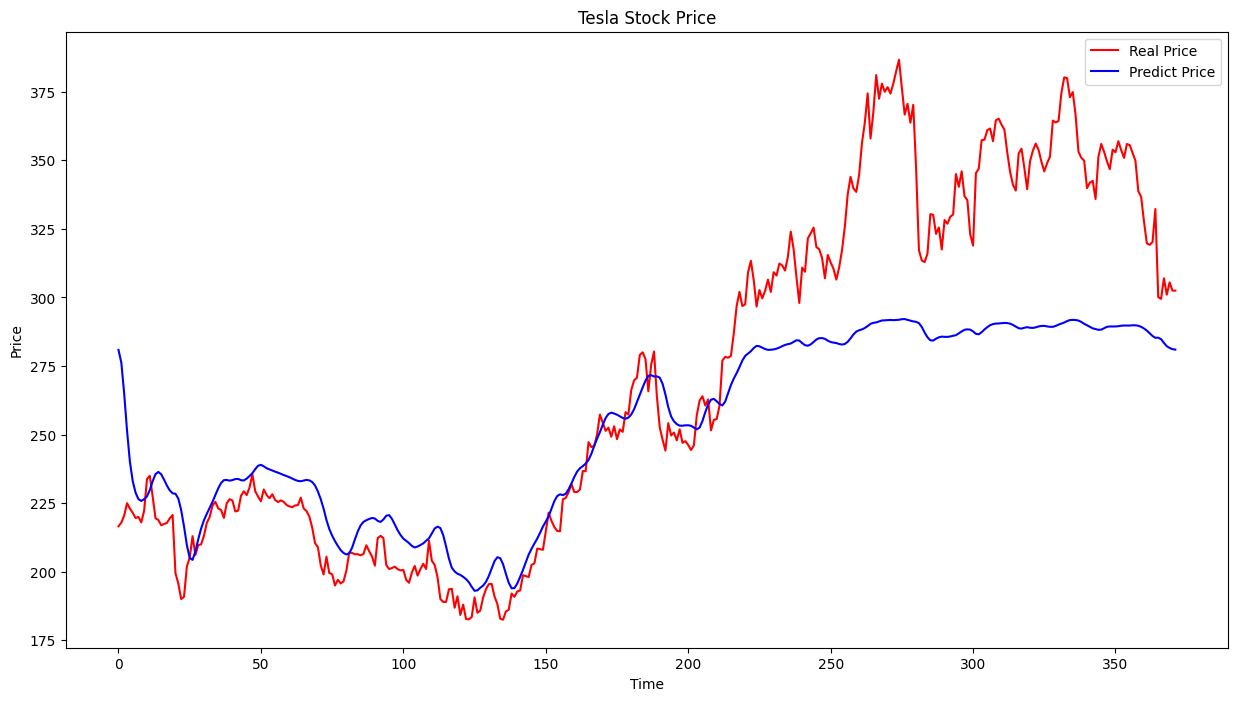

In [86]:
plt.figure(figsize=(15,8))
plt.plot(test_array,color='red',label='Real Price')
plt.plot(ypred,color='blue',label='Predict Price')
plt.title('Tesla Stock Price')
plt.legend()
plt.xlabel("Time")
plt.ylabel('Price')
plt.show()

In [113]:
lstm_model=Sequential()

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))

lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))

lstm_model.add(Dropout(0.20))

lstm_model.add(SimpleRNN(64,activation='tanh',return_sequences=True))

lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64))

lstm_model.add(Dropout(0.20))

lstm_model.add(Dense(1))

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [114]:

lstm_model.compile(optimizer='adam',loss='mse')
lstm_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1555
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0332
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0341
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0259
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0217
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0264
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0219
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0216
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0205
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0236
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0204
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0176
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0197
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0170
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0188
Epoc

In [115]:
y_pred=lstm_model.predict(x_test)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[1.8212597 ],
       [1.7170213 ],
       [1.5326596 ],
       [1.3264092 ],
       [1.1522983 ],
       [1.0405613 ],
       [0.989291  ],
       [0.97303075],
       [0.9730583 ],
       [0.9851652 ],
       [1.0017987 ],
       [1.0351039 ],
       [1.0791887 ],
       [1.1145444 ],
       [1.1318809 ],
       [1.1294979 ],
       [1.1079124 ],
       [1.074206  ],
       [1.0432714 ],
       [1.0265291 ],
       [1.0270773 ],
       [1.0190043 ],
       [0.98361117],
       [0.92326564],
       [0.8558957 ],
       [0.80842704],
       [0.8005149 ],
       [0.82735604],
       [0.8674856 ],
       [0.90205485],
       [0.92894447],
       [0.9522688 ],
       [0.9763549 ],
       [1.0005122 ],
       [1.0274936 ],
       [1.0568459 ],
       [1.0848541 ],
       [1.1034479 ],
       [1.108863  ],
       [1.1074239 ],
       [1.1061593 ],
       [1.1120129 ],
       [1.1160064 ],
       [1.1148685 ],
       [1.113612  ],
       [1.1179644 ],
       [1.1283303 ],
       [1.142

In [116]:
y_pred=scaler.inverse_transform(y_pred)

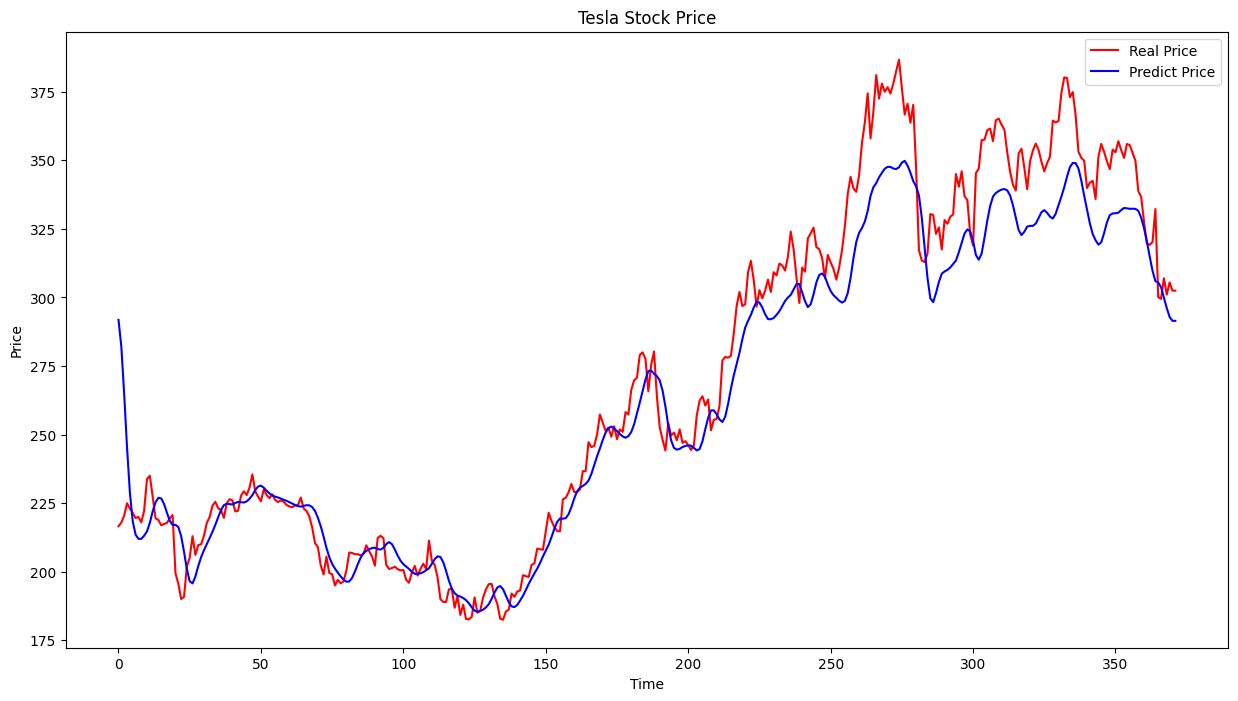

In [117]:
plt.figure(figsize=(15,8))
plt.plot(test_array,color='red',label='Real Price')
plt.plot(y_pred,color='blue',label='Predict Price')
plt.title('Tesla Stock Price')
plt.legend()
plt.xlabel("Time")
plt.ylabel('Price')
plt.show()